In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
# Import in fly data. If you have a .csv or .txt you can substitute
# NOTE: You should rename 'lat', 'lon' in your data or rename it in this notebook.
# fly_df = pd.read_csv(<path_to_data.csv>)
fly_df = pd.DataFrame({'fly_id':[1,2], 'lat': [45,75], 'lon':[-110,-100]})

In [3]:
# Read in climate classification
climate_gdf = gpd.read_file('data/c1976_2000_0/c1976_2000.shp')

In [4]:
# Read in csv to translate codes to climate types
climate_translate = pd.read_csv('data/translation.csv')


In [5]:
# Combine geodataframe of climate classifcation with climate translation coddes
climate_gdf = climate_gdf.merge(climate_translate, on ='GRIDCODE',how='left')

In [6]:
# Convert latitude and longitude points to geodataframe
# Note: this assumes your latitude is named 'lat' etc.
fly_gdf = gpd.GeoDataFrame(
    fly_df, geometry=gpd.points_from_xy(fly_df.lon, fly_df.lat), crs="EPSG:4004"
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


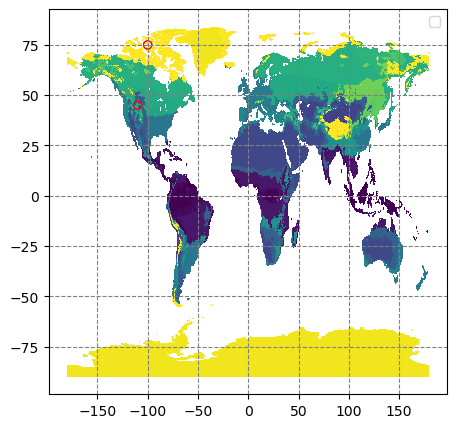

In [46]:

ax = climate_gdf.plot(column='GRIDCODE')
plt.grid(color='gray', linestyle='--')
fly_gdf.plot(ax=ax, facecolors='none', edgecolors='r', figsize=(100, 100))
plt.rcParams['figure.figsize'] = [15, 5]

plt.savefig('map.png',dpi=500)



In [26]:
# Preforms a spatial join to extract points of fly locations to each climate zone
join_df = climate_gdf.sjoin(fly_gdf, how="left")
join_df = join_df[~join_df['fly_id'].isnull()]


In [47]:
join_df

,ID,GRIDCODE,geometry,Code,index_right,fly_id,lat,lon
34,35,62,"POLYGON ((-105.00000 78.00000, -105.00000 77.5...",ET,1.0,2.0,75.0,-100.0
684,685,43,"POLYGON ((-109.50000 45.50000, -109.50000 45.0...",Dfc,0.0,1.0,45.0,-110.0


In [48]:
join_df[['fly_id','GRIDCODE','Code']]

,fly_id,GRIDCODE,Code
34,2.0,62,ET
684,1.0,43,Dfc


In [28]:
# You can save this with .to_csv
# join_df.to_csv(<output_file_name.csv>)